# Choropleth map of Red, Orange and Green zones in India


### Import basic libraries


In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
import pandas as pd

### Data

#### 1. Covid-19 Patient number Data


In [ ]:
districtdata = pd.read_csv('https://api.covid19india.org/csv/latest/district_wise.csv')
districtdata.head()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,0,0,0,0,0,NaN,NaN


#### 2. India District Shapefile


In [ ]:
df1 = gpd.read_file('/work/CovidIndia-master/CovidIndia-master/India_Districts/c44c9b96-f570-4ee3-97f1-ebad64efa4c2202044-1-1rb4x6s.8xx6.shp')

<AxesSubplot:>

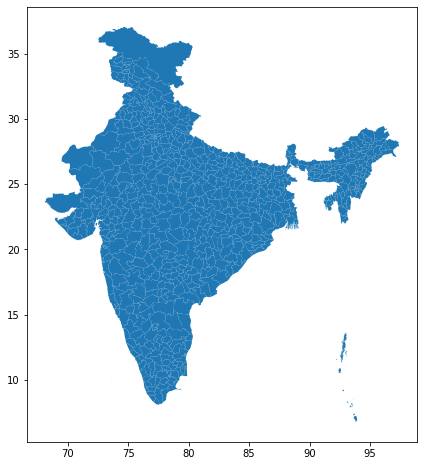

In [ ]:
## showing the India map based on the shapefile... See the districts boundary
df1.plot(figsize = (8,8))

#### 3. Districtwise zone data


In [ ]:
zones = pd.read_csv('/work/CovidIndia-master/CovidIndia-master/Zones in India.csv')

zones.head()

,No,District,State,Zone
0,1,South Andaman,Andaman and Nicobar Islands,Red
1,2,Nicobars,Andaman and Nicobar Islands,Green
2,3,North and Middle Andaman,Andaman and Nicobar Islands,Green
3,4,Kurnool,Andhra Pradesh,Red
4,5,Guntur,Andhra Pradesh,Red


### Data Cleaning

In [ ]:
# Capitalizing the first letter of the state names 
for i in range(df1.shape[0]): df1['statename'][i] = df1['statename'][i].title()

# Correcting the state and UT names
df1['statename'].replace({'Andaman & Nicobar': 'Andaman and Nicobar Islands', 
                          'Dadra & Nagar Have': 'Dadra and Nagar Haveli and Daman and Diu',
                          'Daman & Diu' : 'Dadra and Nagar Haveli and Daman and Diu',
                          'Jammu & Kashmir' : 'Jammu and Kashmir'}, inplace=True)



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Correcting the spellings of districts in the dataframe made from shapefile and changing some column names

In [ ]:
# Spelling correction
df1['distname'].replace({'Baramula' : 'Baramulla',
                         'Bandipore' : 'Bandipora',
                         'Badgam' : 'Budgam',
                         'Shupiyan' : 'Shopiyan',
                         'Sahibzada Ajit Singh Nag*' : 'S.A.S. Nagar',
                         'Firozpur': 'Ferozepur',
                         'Lahul & Spiti' : 'Lahaul and Spiti',
                         'Charki Dadri': 'Charkhi Dadri',
                         'Central' : 'Central Delhi',
                         'East' : 'East Delhi',
                         'North' : 'North Delhi', 
                         'South West' : 'South West Delhi', 
                         'South' : 'South Delhi', 
                         'North East' : 'North East Delhi', 
                         'West' : 'West Delhi', 
                         'South East': 'South East Delhi', 
                         'North West' : 'North West Delhi',
                         'Jhunjhunun': 'Jhunjhunu', 
                         'Jalor' : 'Jalore', 
                         'Chittaurgarh' : 'Chittorgarh', 
                         'Dhaulpur': 'Dholpur',
                         'Chota Udaipur': 'Chhota Udaipur', 
                         'Kachchh' : 'Kutch', 
                         'The Dangs' : 'Dang', 
                         'Banas Kantha' : 'Banaskantha', 
                         'Ahmadabad' : 'Ahmedabad', 
                         'Sabar Kantha' : 'Sabarkantha', 
                         'Dohad' : 'Dahod', 
                         'Mahesana' : 'Mehsana', 
                         'Panch Mahals' : 'Panchmahal', 
                         'Faizabad' : 'Ayodhya', 
                         'Kheri' : 'Lakhimpur Kheri', 
                         'Bara Banki': 'Barabanki', 
                         'Mahrajganj' : 'Maharajganj',
                         'Pashchim Champaran': 'West Champaran', 
                         'Kaimur (bhabua)': 'Kaimur', 
                         'Purba Champaran': 'East Champaran',
                         'Purbi Singhbhum': 'East Singhbhum', 
                         'Pashchimi Singhbhum': 'West Singhbhum', 
                         'Saraikela-kharsawan': 'Saraikela-Kharsawan', 
                         'Kodarma': 'Koderma',
                         'Narsimhapur': 'Narsinghpur', 
                         'West Nimar': 'Khargone', 
                         'East Nimar': 'Khandwa',
                         'Janjgir - Champa' : 'Janjgir Champa',
                         'Almora\n': 'Almora',
                         'Garhwal': 'Pauri Garhwal', 
                         'Hardwar': 'Haridwar', 
                         'Darjiling': 'Darjeeling', 
                         'Maldah' : 'Malda', 
                         'North Twenty Four Pargan*' : 'North 24 Parganas', 
                         'Medinipur West' : 'Paschim Medinipur', 
                         'Puruliya': 'Purulia', 
                         'South Twenty Four Pargan*' : 'South 24 Parganas',
                         'North  District': 'North District',
                         'South Salmara Mancachar': 'South Salmara Mankachar',
                         'Anugul': 'Angul', 
                         'Jajapur': 'Jajpur', 
                         'Jagatsinghapur' : 'Jagatsinghpur', 
                         'Baleshwar': 'Balasore', 
                         'Baudh': 'Boudh', 
                         'Debagarh' : 'Deogarh',
                         'Ahmadnagar' : 'Ahmednagar', 
                         'Gondiya' : 'Gondia', 
                         'Bid' : 'Beed', 
                         'Buldana': 'Buldhana',
                         'Jagitial' : 'Jagtial', 
                         'Jayashankar' : 'Jayashankar Bhupalapally', 
                         'Jangoan': 'Jangaon', 
                         'Kumuram Bheem Asifabad' : 'Komaram Bheem',
                         'Y.S.R.': 'Y.S.R. Kadapa', 
                         'Sri Potti Sriramulu Nell*' : 'S.P.S. Nellore',
                         'Bangalore' : 'Bengaluru Urban',
                         'The Nilgiris': 'Nilgiris', 
                         'Kanniyakumari' : 'Kanyakumari',
                         'North  & Middle Andaman': 'North and Middle Andaman',
                         'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli'},inplace = True)

for i in range(df1.shape[0]):
        if df1['statename'][i] == 'Maharashtra' and df1['distname'][i] == 'Raigarh':
            df1['distname'][i] = 'Raigad'            

# Changing column name
df1 = df1.rename(columns={'distname': 'District', 'statename': 'State'})

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Data Preparation

Creating a common dataframe with all data.<br>
In df1 (shapefile), we merged the covid19 patients data based on District and State, then the zones dataframe was similarly merged. Few unneccesary columns were also dropped

In [ ]:
newdf = df1.merge(districtdata[['State', 'District', 'Confirmed', 'Active', 'Recovered', 'Deceased']], on = ['District', 'State'])
newdf = newdf.merge(zones[['State', 'District', 'Zone']], on = ['District', 'State'])
newdf = newdf.drop(columns = ['statecode', 'state_ut', 'distcode', 'countrynam'])

###  Importing advanced libraries

In [ ]:
import json
from bokeh.io import show
from bokeh.io import output_file, save
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          CategoricalColorMapper, LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.io import output_notebook
from bokeh.plotting import figure

#### Preparing to create the plot

Create GeoJSONDataSource object with our initial data

In [ ]:
geosource = GeoJSONDataSource(geojson = newdf.to_json())

Define the color palette to use and mapping to categorical values of Zones

In [ ]:
# Define color palette
palette = ['red', 'orange', 'green']

color_mapper = CategoricalColorMapper(palette = palette, factors = ['Red', 'Orange', 'Green'])


### Choropleth Map

In [ ]:
# Create figure object.
p = figure(title = 'Red, Green and Orange Distric of Covid19:  May 2021',
           plot_height = 700 ,
           plot_width = 650, 
           toolbar_location = 'right',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.title.text_font_size = '12pt'
p.title.align = 'center'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'Zone',
                                 'transform' : color_mapper},
                   line_color = 'black',
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('District','@District'),
                                  ('State','@State'),
                                  ('Zone','@Zone'),
                                  ('Confirmed cases','@Confirmed'),
                                  ('Active cases','@Active'),
                                  ('Recovered cases','@Recovered'),
                                  ('Deaths','@Deceased')
                                 ]))

output_file('plot.html', mode='inline')
save(p) # saves plot.html

'/work/plot.html'

Cool! Our choropleth map has been generated. A toolbox in the right could be used to zoom and move the map.

In [ ]:
show(p, notebook_handle = True) # displays plot.html in browser

Check out the video to see the output https://youtu.be/JuF4cNeWKzc 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d20f0b1-a95e-4774-951b-ce52162787ce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>